In [37]:
import pandas as pd
from parameters import F_to_K
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [38]:
# plotting style 
plt.rcParams["font.family"] = "monospace"

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

tls = 22
# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_title(title,fontsize=tls)
    ax.set_xlabel(x_label,fontsize=tls)
    ax.set_ylabel(y_label,fontsize=tls)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks,labelsize=tls)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,labelsize=tls)
    ax.set_yscale(y_scale)

lw = 3

In [39]:
# read data
df_inlet_correction = pd.read_csv('./data/inlet_correction.csv',header=None, sep=";", decimal=",")
df_inlet_correction[0] = [F_to_K(t) for t in df_inlet_correction[0]]
df_inlet_correction[1] = [F_to_K(t) for t in df_inlet_correction[1]]

df_outlet_correction = pd.read_csv('./data/outlet_correction.csv',header=None, sep=";", decimal=",")
df_outlet_correction[0] = [F_to_K(t) for t in df_outlet_correction[0]]
df_outlet_correction[1] = [F_to_K(t) for t in df_outlet_correction[1]]

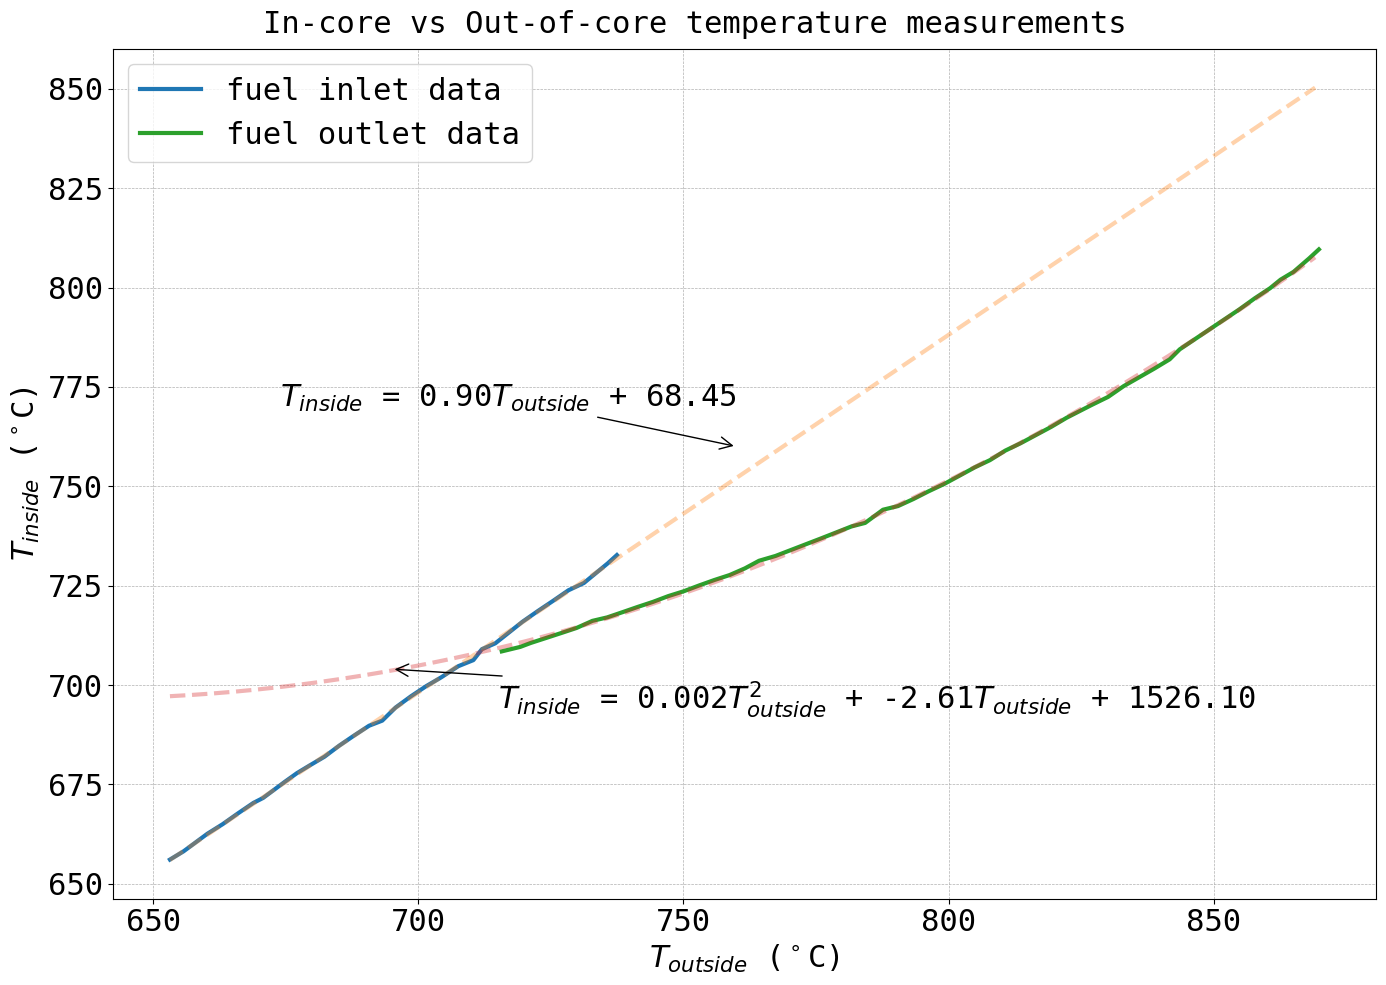

In [40]:
fig, axs = plt.subplots(1, 1, figsize=(14, 10))

df_in_interp = np.polyfit(df_inlet_correction[0] -273, df_inlet_correction[1]-273, deg = 1)
df_out_interp = np.polyfit(df_outlet_correction[0]-273, df_outlet_correction[1]-273, deg=2)

range = np.arange(df_inlet_correction[0][0]-273, df_outlet_correction[0].iloc[-1]-273, 1)

update_axis_style(axs, None)

axs.plot(df_inlet_correction[0] -273, df_inlet_correction[1]-273, label='fuel inlet data', linewidth=lw)
axs.plot(range, np.polyval(df_in_interp, range), linestyle='--', alpha=0.35, linewidth=lw)

axs.plot(df_outlet_correction[0]-273, df_outlet_correction[1]-273, label='fuel outlet data', linewidth=lw)
axs.plot(range, np.polyval(df_out_interp, range), linestyle='--', alpha=0.35, linewidth=lw)

axs.set_ylabel(r"$T_{inside}$ ($^\circ$C)")
axs.set_xlabel(r"$T_{outside}$ ($^\circ$C)")

# add labels
lin_coeffs = np.poly1d(df_in_interp)
linear_eq = f"$T_{{inside}}$ = {lin_coeffs.c[0]:.2f}$T_{{outside}}$ + {lin_coeffs.c[1]:.2f}"

quad_coeffs = np.poly1d(df_out_interp)
quad_eq = f"$T_{{inside}}$ = {quad_coeffs.c[0]:.2g}$T_{{outside}}^2$ + {quad_coeffs.c[1]:.2f}$T_{{outside}}$ + {quad_coeffs.c[2]:.2f}"

# choose points for annotations
linear_point = (760, 760)
quad_point = (695,704)

axs.annotate(linear_eq, xy=linear_point, xytext=(linear_point[0], linear_point[1]+10),
            arrowprops=dict(arrowstyle="->"), ha='right', fontsize = 22)
axs.annotate(quad_eq, xy=quad_point, xytext=(quad_point[0]+20, quad_point[1]-10),
            arrowprops=dict(arrowstyle="->"), ha='left',fontsize = 22)

axs.legend(fontsize=tls)
fig.suptitle("In-core vs Out-of-core temperature measurements", fontsize=tls)
fig.tight_layout()

In [41]:
quad_point

(695, 704)